In [1]:
using Pkg; Pkg.activate(".");
using Revise
using Statistics
import MUST
using PyPlot
using DelimitedFiles

MUST.@get_help_py stagger
MUST.@get_help visual 
MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2";

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost/Project.toml`


In [2]:
folder = "stagger_sun/"
model  = "t5777g44m0005";
snap_j = MUST.StaggerSnap(model, folder);

┌ Warning: bx not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: by not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: bz not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332


In [3]:
v = "MARCS"

"MARCS"

In [4]:
# The gas pressure is not saved in dispatch, so we use the same EOS for both to get it
eos_path = "input_data/solar_lte"
eos_path = "input_data/TSO_sun_Magg_v1"
eos_path = "input_data/TSO_sun_Magg_v3.1"
eos_path = "input_data/TSO_sun_Magg_v7.1"
eos_path = "input_data/TSO_sun_Magg_v10.1"
eos_path = "input_data/LegacyStagger_sun"
eos_path = "input_data/DIS_MARCS_v0.1.1"
sqEOS = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

In [5]:
b = MUST.Box(snap_j, eos=sqEOS);

size(v) = (238,)
size(old_z) = (238,)


┌ Info: Recomputing Energy from EoS.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_atmos2legacy.jl:133


In [6]:
z = MUST.axis(b, :z)
d = MUST.plane_statistic(mean, b, :τ_ross)
plt.semilogy(z, d)

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2b659c44dee0>

In [7]:
MUST.save(b; name="box_solar_stagger_$(v)", folder="")

"box_solar_stagger_MARCS.hdf5"

In [8]:
stagger_τ  = MUST.height_scale(b, :τ_ross);

In [9]:
MUST.save(stagger_τ; name="box_solar_stagger_$(v)_t", folder="")

"box_solar_stagger_MARCS_t.hdf5"

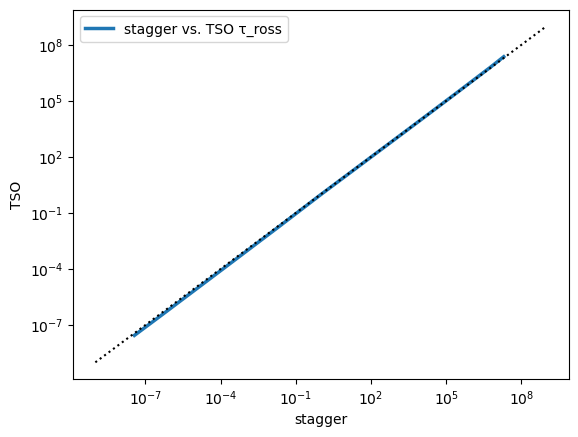

In [10]:
close()
d = MUST.plane_statistic(mean, b, :τ_ross)
z = MUST.plane_statistic(mean, b, :τ_ross_stag)
plt.plot(z, d, label="stagger vs. TSO τ_ross", lw=2.5)

x = exp10.(collect(range(-9.,9.,length=50)))
plt.plot(x, x, color="k", ls=":")

plt.yscale("log")
plt.xscale("log")

plt.xlabel("stagger")
plt.ylabel("TSO")
plt.legend()
gcf()

In [11]:
model = readdlm("../initial_conditions/staggertest.dat", skipstart=2)
z_goal, T_goal, d_goal = -model[:, 1], model[:, 2], model[:, 3];

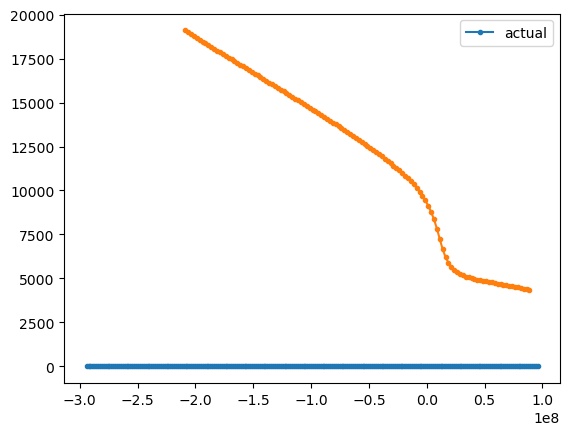

In [12]:
close()
d = MUST.plane_statistic(mean, b, :T)
z = MUST.axis(b, :z)
d = MUST.plane_statistic(mean, b, :d)
plt.plot(z, d, marker=".", label="actual")
plt.plot(z_goal, T_goal, marker=".")

#plt.xscale("log")
plt.legend()
gcf()

In [13]:
T = MUST.plane_statistic(mean, b, :T)
d = MUST.plane_statistic(mean, b, :d)
z = MUST.axis(b, :z)

open("stagger_av.dat", "w") do f
    writedlm(f, [z T log.(d)])
end